In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.6.0


In [3]:
reliance=yf.download('RELIANCE.NS',"2010-01-01","2020-09-16")
raymond=yf.download('RAYMOND.NS',"2010-01-01","2018-01-01")
daichi=yf.download('526821.BO',"2010-01-01","2018-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,545.549988,545.549988,510.924988,537.750000,457.306488,35040012
2010-01-05,574.950012,574.950012,532.700012,535.349976,455.265503,9780080
2010-01-06,539.950012,547.250000,535.325012,544.000000,462.621460,10831076
2010-01-07,544.000000,557.500000,539.000000,553.025024,470.296417,11976808
2010-01-08,554.000000,556.900024,548.000000,551.575012,469.063354,6907852


In [5]:
reliance['Open'].iplot()

In [6]:
raymond.iplot(kind='hist',x=reliance.index,y='Adj Close')

In [7]:
raymond['Open'].iplot()

In [8]:
daichi['Open'].iplot()

In [9]:
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,545.549988,545.549988,510.924988,537.750000,457.306488,35040012
2010-01-05,574.950012,574.950012,532.700012,535.349976,455.265503,9780080
2010-01-06,539.950012,547.250000,535.325012,544.000000,462.621460,10831076
2010-01-07,544.000000,557.500000,539.000000,553.025024,470.296417,11976808
2010-01-08,554.000000,556.900024,548.000000,551.575012,469.063354,6907852


In [10]:
reliance.index[0]

Timestamp('2010-01-04 00:00:00')

In [11]:
training_set=daichi['Open']
training_set=pd.DataFrame(training_set)

In [12]:
training_set.head()

,Open
Date,
2015-01-02,168.800003
2015-01-05,163.000000
2015-01-06,160.000000
2015-01-07,155.000000
2015-01-08,159.949997


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [14]:
scaled_training=sc.fit_transform(training_set)

In [15]:
scaled_training.shape

(739, 1)

In [16]:
X_train=[]
y_train=[]
for i in range(60,739):
    X_train.append(scaled_training[i-60:i,0])
    y_train.append(scaled_training[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [18]:
regressor=Sequential()

In [19]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [20]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 3s 118ms/step - loss: 0.0864
Epoch 2/100
22/22 [==============================] - 3s 135ms/step - loss: 0.0215
Epoch 3/100
22/22 [==============================] - 3s 121ms/step - loss: 0.0184
Epoch 4/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0170
Epoch 5/100
22/22 [==============================] - 3s 138ms/step - loss: 0.0155
Epoch 6/100
22/22 [==============================] - 2s 111ms/step - loss: 0.0136
Epoch 7/100
22/22 [==============================] - 2s 99ms/step - loss: 0.0131
Epoch 8/100
22/22 [==============================] - 2s 100ms/step - loss: 0.0116
Epoch 9/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0123
Epoch 10/100
22/22 [==============================] - 2s 97ms/step - loss: 0.0131
Epoch 11/100
22/22 [==============================] - 2s 99ms/step - loss: 0.0102
Epoch 12/100
22/22 [==============================] - 2s 98ms/step - loss: 0.0101
Epoch 13/100
22/2

In [21]:
daichi_test=yf.download('526821.BO',"2018-01-02","2020-09-15")

[*********************100%***********************]  1 of 1 completed


In [22]:
daichi_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,425.0,439.950012,415.049988,435.200012,435.200012,4129
2018-01-03,430.0,434.000000,416.100006,423.649994,423.649994,2634
2018-01-04,418.5,445.000000,418.500000,440.200012,440.200012,5116
2018-01-05,442.0,464.799988,435.049988,455.299988,455.299988,18912
2018-01-08,465.0,470.000000,454.000000,462.700012,462.700012,13537


In [23]:
daichi_test.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-12', '2018-02-14', '2018-02-15', '2018-02-16',
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01', '2018-03-05', '2018-03-06', '2018-03-07',
               '2018-03-08', '2018-03-09', '2018-03-12', '2018-03-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [24]:
real_stock_price=daichi_test.iloc[:,0:1].values

In [25]:
real_stock_price

array([[425.        ],
       [430.        ],
       [418.5       ],
       [442.        ],
       [465.        ],
       [458.        ],
       [460.        ],
       [475.        ],
       [484.        ],
       [470.        ],
       [482.6000061 ],
       [451.        ],
       [460.        ],
       [420.        ],
       [410.        ],
       [425.        ],
       [415.8500061 ],
       [420.        ],
       [419.        ],
       [416.        ],
       [415.        ],
       [428.        ],
       [410.        ],
       [398.5       ],
       [402.        ],
       [438.        ],
       [452.        ],
       [435.        ],
       [440.        ],
       [517.        ],
       [496.        ],
       [484.6000061 ],
       [498.        ],
       [448.        ],
       [474.        ],
       [470.        ],
       [465.        ],
       [489.        ],
       [480.20001221],
       [460.        ],
       [485.        ],
       [494.        ],
       [455.04998779],
       [422

In [26]:
test_set=daichi_test['Open']
test_set=pd.DataFrame(test_set)

In [27]:
daichi_total=pd.concat((daichi['Open'],daichi_test['Open']),axis=0)
inputs=daichi_total[len(daichi_total)-len(daichi_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)


In [28]:
X_test=[]

In [29]:
for i in range(60,108):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)


In [30]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [31]:
predicted_daichi_price=regressor.predict(X_test)

In [32]:
# nsamples, nx, ny = predicted_daichi_price.shape
# predicted_daichi_price = predicted_daichi_price.reshape((nsamples,nx*ny))

In [33]:
predicted_daichi_price=sc.inverse_transform(predicted_daichi_price)

In [34]:
predicted_daichi_price=pd.DataFrame(predicted_daichi_price)

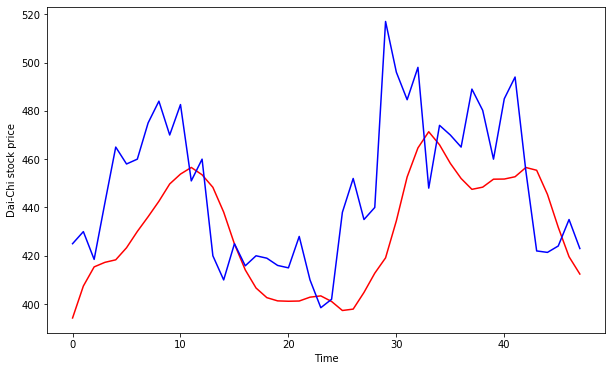

In [35]:
plt.figure(figsize=(10,6))
plt.plot(predicted_daichi_price,color='red',label='Predicted price')
plt.plot(real_stock_price,color='blue',label='Real price')
plt.ylabel('Dai-Chi stock price')
plt.xlabel('Time')
plt.show()